# Student grades prediction

Importing all the required libries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from scipy import stats
from scipy.stats import skew,boxcox
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv('student_grade.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


Downloding the dataset

## Exploring Data Variables

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
df.tail(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
561,CS-97562,B-,B,A-,B+,B-,B+,A-,A,B,...,B+,B-,B+,D+,C+,B-,B+,C,C+,2.828
562,CS-97563,B,B,A,C,B,B+,B,C-,B+,...,A-,B,B+,B+,B+,C+,A-,D+,C+,2.821
563,CS-97564,A-,B,A,D+,B+,A-,C,A,C+,...,B+,C,B+,C-,C-,C,F,D,C,2.612
564,CS-97565,A-,D,A,C,B+,B+,C,A-,B-,...,B,C+,B+,D+,C,C-,B,C,B-,2.607
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [5]:
df.sample(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
117,CS-97118,B,C-,C-,C,D,C+,D,B-,A-,...,D+,D+,D+,C-,B,A-,C-,B-,B+,1.993
187,CS-97188,B,A-,B+,B-,B,A-,B+,B+,D+,...,B-,C+,B+,C+,A-,B+,B,B,B,2.895
70,CS-97071,A-,B+,A-,B+,B,A,A-,A,A-,...,B-,A-,A-,C,A-,A,A-,B,A-,3.490
127,CS-97128,B+,B-,A,B,B,A-,D+,A-,B,...,C+,B+,B+,C+,B,A,A-,B+,A-,3.174
33,CS-97034,A,C+,A-,B,A-,B+,C-,B+,A-,...,D+,B-,B-,B-,A-,A,B+,A-,B+,3.112
60,CS-97061,C,B+,WU,D+,C-,B-,F,D,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.418
107,CS-97108,A-,A-,A,A,A+,A,A,A,A,...,A,A,A,B+,A,A,A,A-,A,3.946
291,CS-97292,B,B-,A+,B+,A,B,B+,A+,B+,...,A+,A,A,B+,A,A,B,A,NaN,3.605
559,CS-97560,A-,C+,A,B,B,A-,C+,D,B,...,B+,B-,A,A-,A,C,B+,B+,A-,3.226
545,CS-97546,B,B,A,A,A-,A-,A-,D,A-,...,B,B,A,B+,B,C,B+,C-,B,3.068


In [6]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [7]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

We can observe that this dataset has 2 different types of data types object and float64.

In [8]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [5]:
df.shape

(571, 43)

Check for missing values:

In [9]:
df.isnull()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

So here we encountered null values present in almost all columns.

In [11]:
df.isnull().sum().sum()

425

<AxesSubplot:>

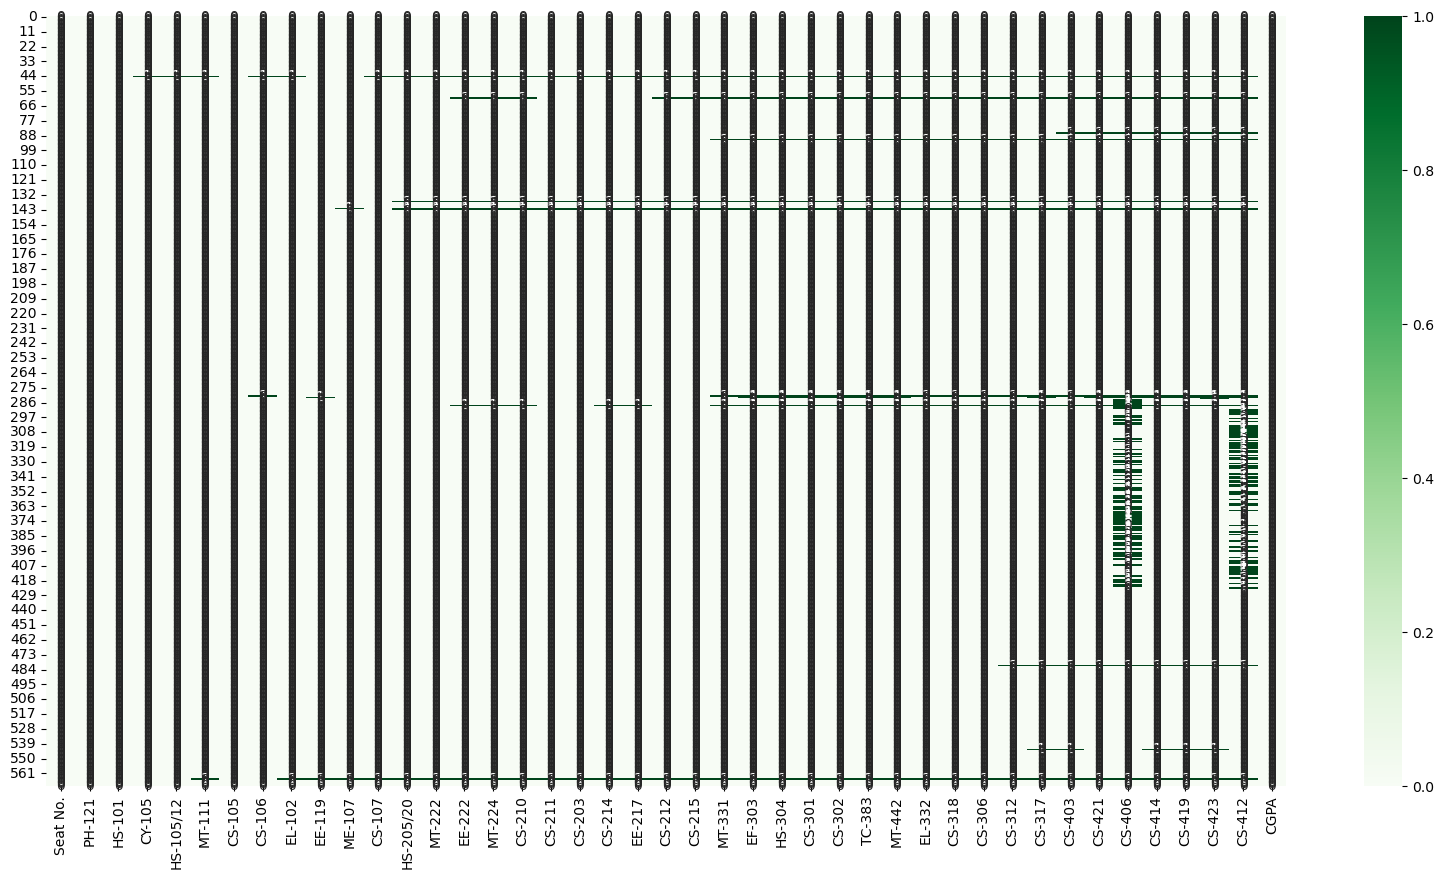

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cmap='Greens',annot=True)

In [13]:
# Check for duplicates
df.duplicated().sum()


0

There is no dublicate value present in this dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

#### Checking for unique values present in each column

In [15]:
df['Seat No.'].nunique()

571

In [16]:
df['PH-121'].nunique()

13

In [17]:
df['PH-121'].unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [18]:
df['HS-101'].unique()

array(['D+', 'D', 'B', 'C+', 'A-', 'B-', 'C-', 'B+', 'C', 'A', 'A+', 'F'],
      dtype=object)

In [19]:
df['HS-101'].nunique()

12

In [20]:
df['CS-106'].unique()

array(['D', 'B-', 'D+', 'A-', 'C+', 'A', 'C-', 'C', 'B', 'B+', nan, 'A+',
       'F', 'WU'], dtype=object)

In [21]:
df['CS-106'].nunique()

13

In [22]:
df['CS-306'].unique()

array(['C', 'D', 'A-', 'C-', 'B+', 'C+', 'B-', 'B', 'A', 'D+', nan, 'A+',
       'F', 'WU'], dtype=object)

In [23]:
df['CS-306'].nunique()

13

In [24]:
df['CS-306'].value_counts()

A-    120
B+     75
A      74
B-     64
B      53
C-     40
C      37
C+     36
D      31
D+     18
A+     10
F       3
WU      1
Name: CS-306, dtype: int64

In [25]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64


A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51

In [26]:
df.nunique().to_frame('No of unique values')

,No of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


In [27]:
df.shape

(571, 43)

## Data Visualization

### Univariate Analysis

<AxesSubplot:xlabel='PH-121'>

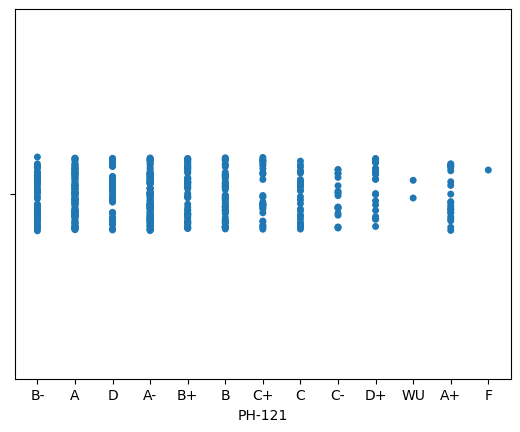

In [28]:
sns.stripplot(df['PH-121'])

<AxesSubplot:xlabel='HS-101'>

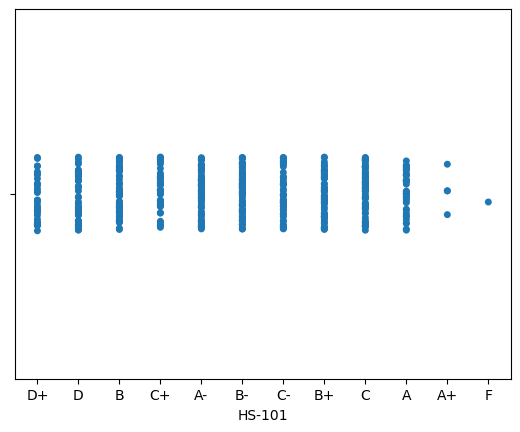

In [29]:
sns.stripplot(df['HS-101'])

<AxesSubplot:xlabel='HS-105/12', ylabel='Count'>

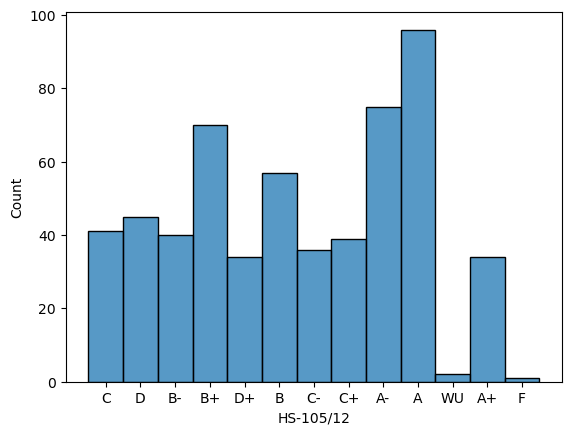

In [30]:
sns.histplot(df['HS-105/12'])

<AxesSubplot:xlabel='CY-105', ylabel='Count'>

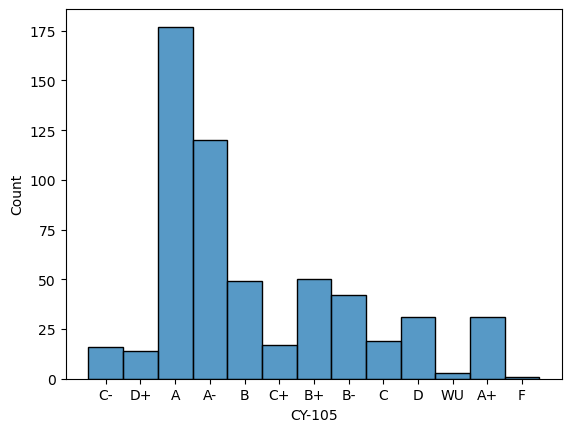

In [31]:
sns.histplot(df['CY-105'])

<AxesSubplot:xlabel='MT-222', ylabel='Count'>

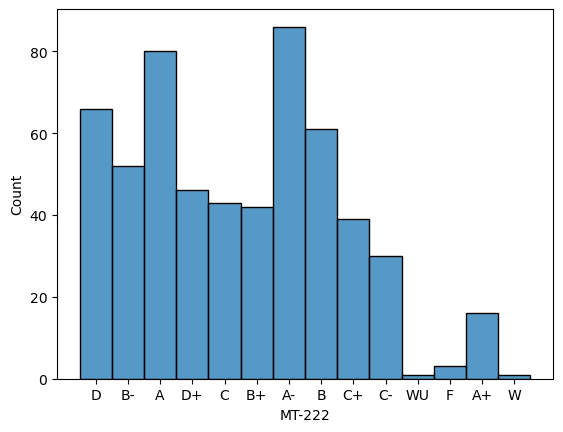

In [32]:
sns.histplot(df['MT-222'])

<AxesSubplot:xlabel='CS-210', ylabel='Count'>

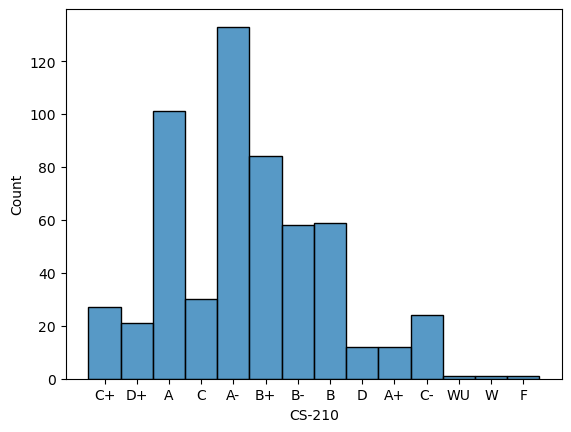

In [33]:
sns.histplot(df['CS-210'])

<AxesSubplot:xlabel='CS-419', ylabel='Count'>

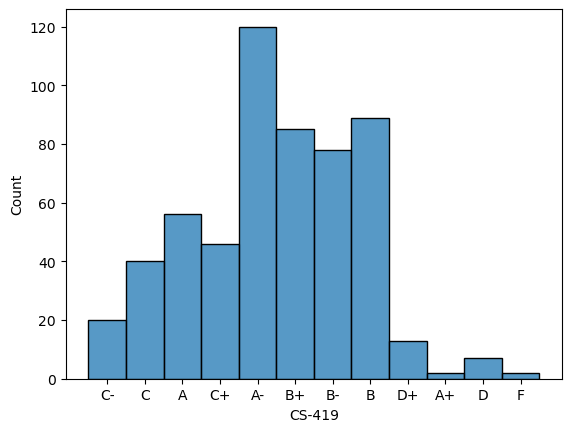

In [34]:
sns.histplot(df['CS-419'])

<AxesSubplot:xlabel='EF-303', ylabel='Count'>

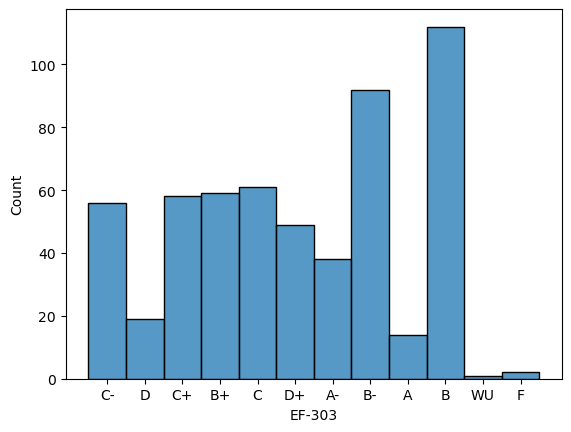

In [35]:
sns.histplot(df['EF-303'])

<AxesSubplot:xlabel='CS-306', ylabel='Count'>

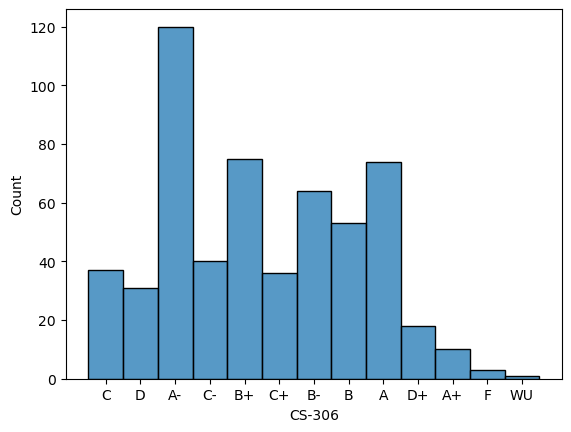

In [36]:
sns.histplot(df['CS-306'])

<AxesSubplot:xlabel='TC-383', ylabel='Count'>

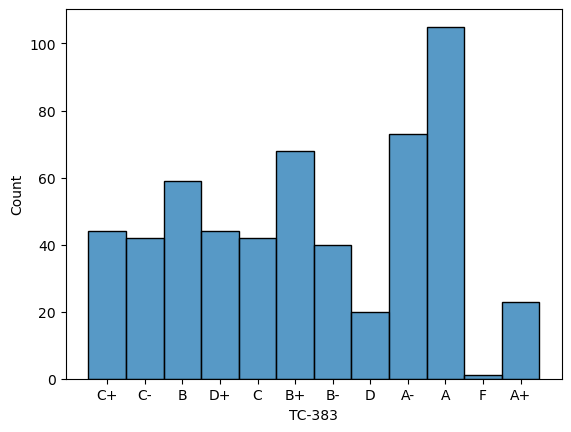

In [37]:
sns.histplot(df['TC-383'])

<AxesSubplot:xlabel='CS-423', ylabel='Count'>

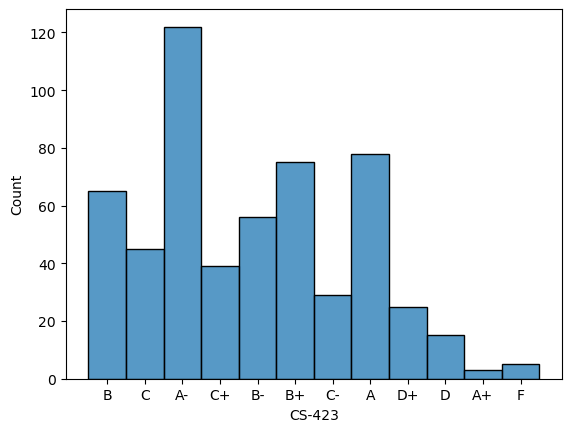

In [38]:
sns.histplot(df['CS-423'])

<AxesSubplot:xlabel='ME-107', ylabel='Count'>

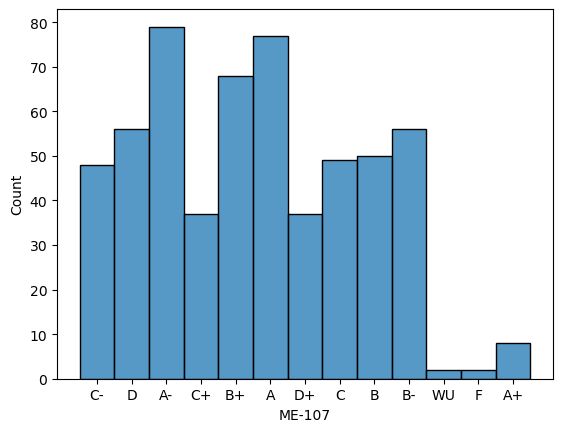

In [39]:
sns.histplot(df['ME-107'])

<AxesSubplot:xlabel='CS-317', ylabel='Count'>

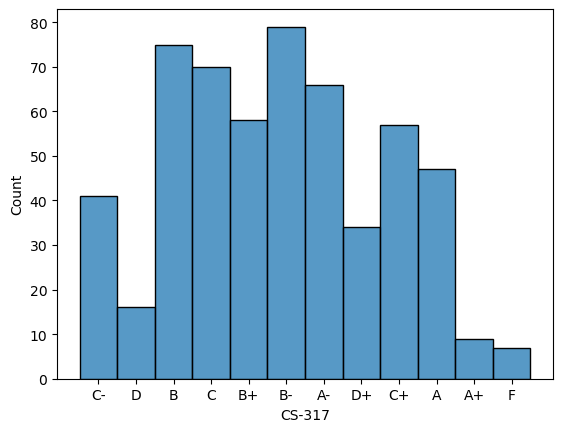

In [40]:
sns.histplot(df['CS-317'])

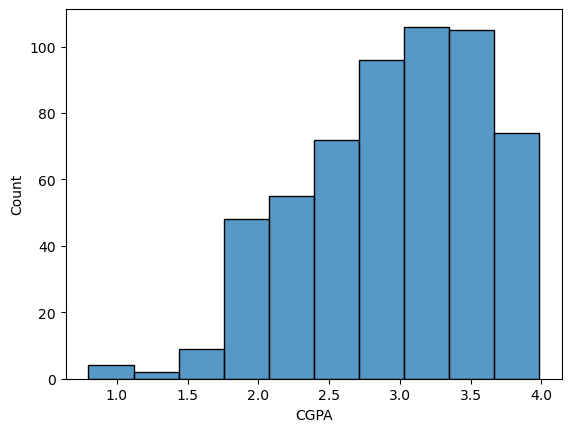

In [41]:
#Visualize the distribution of the target variable
sns.histplot(df['CGPA'], bins=10)
plt.show()

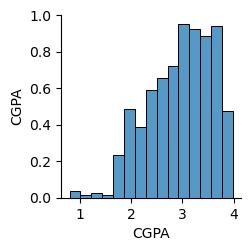

In [42]:
sns.pairplot(df)
plt.show()

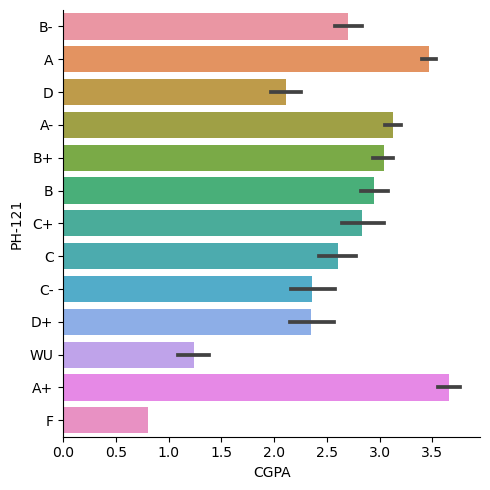

In [43]:
sns.catplot(x='CGPA',y='PH-121',data=df,kind='bar')

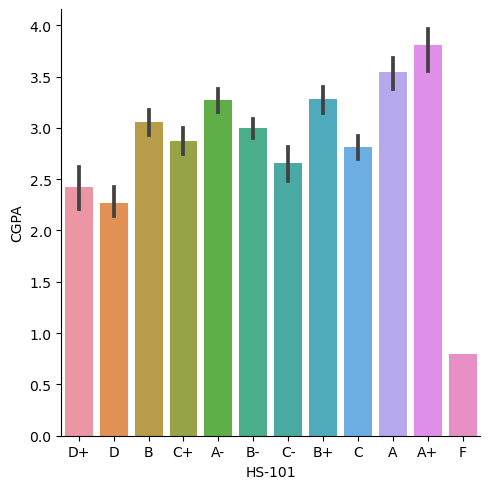

In [44]:
sns.catplot(x='HS-101',y='CGPA',data=df,kind='bar')

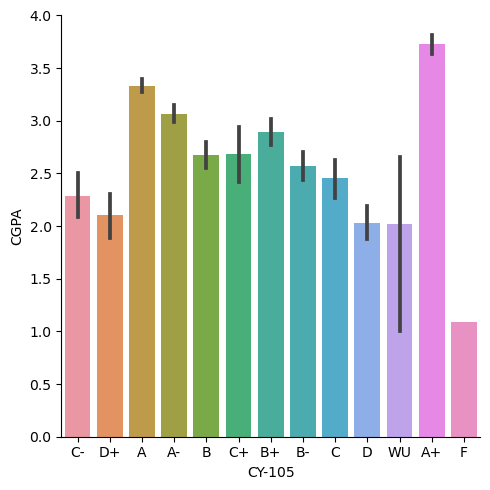

In [45]:
sns.catplot(x='CY-105',y='CGPA',data=df,kind='bar')

<AxesSubplot:xlabel='EE-119', ylabel='CGPA'>

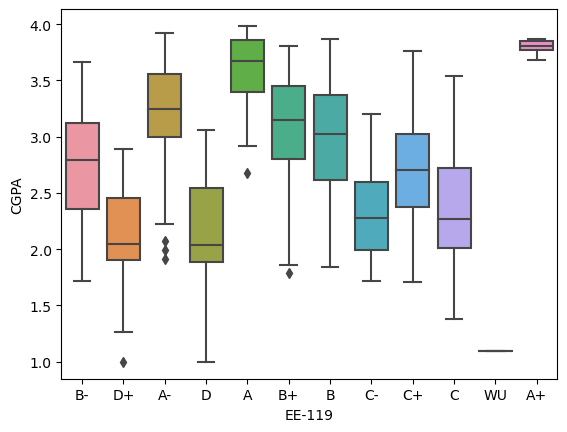

In [46]:
sns.boxplot(x='EE-119',y='CGPA',data=df)

<AxesSubplot:xlabel='CS-211', ylabel='CGPA'>

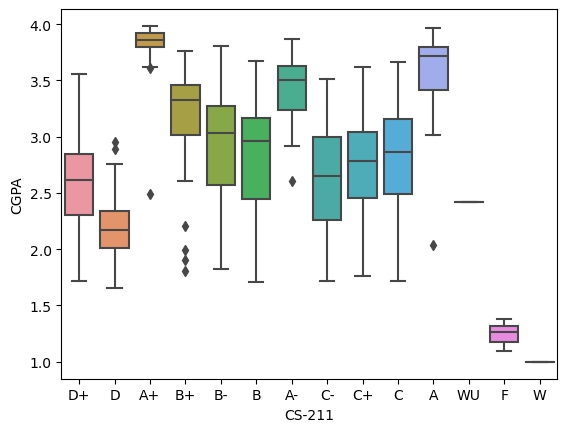

In [47]:
sns.boxplot(x='CS-211',y='CGPA',data=df)

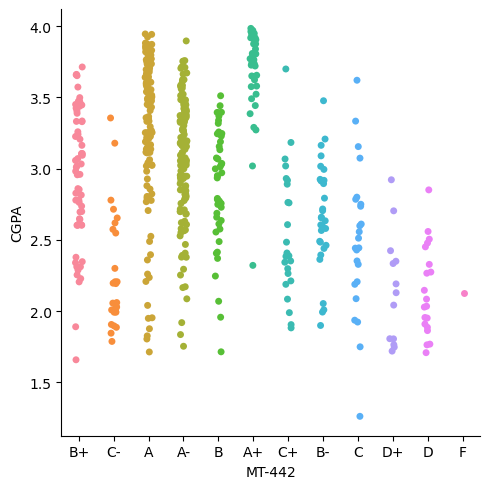

In [48]:
sns.catplot(x='MT-442',y='CGPA',data=df,kind='strip')

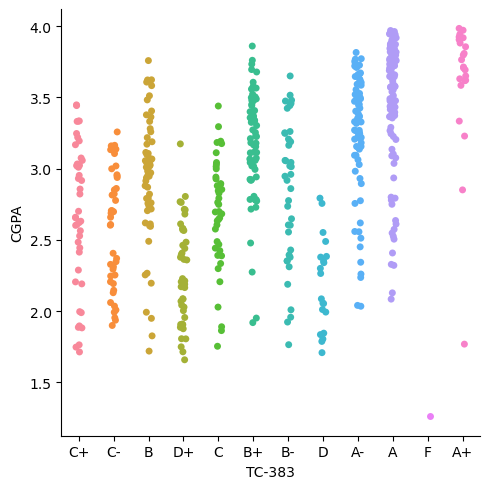

In [49]:
sns.catplot(x='TC-383',y='CGPA',data=df,kind='strip')

In [50]:
corr=df.corr()
corr

,CGPA
CGPA,1.0


<AxesSubplot:>

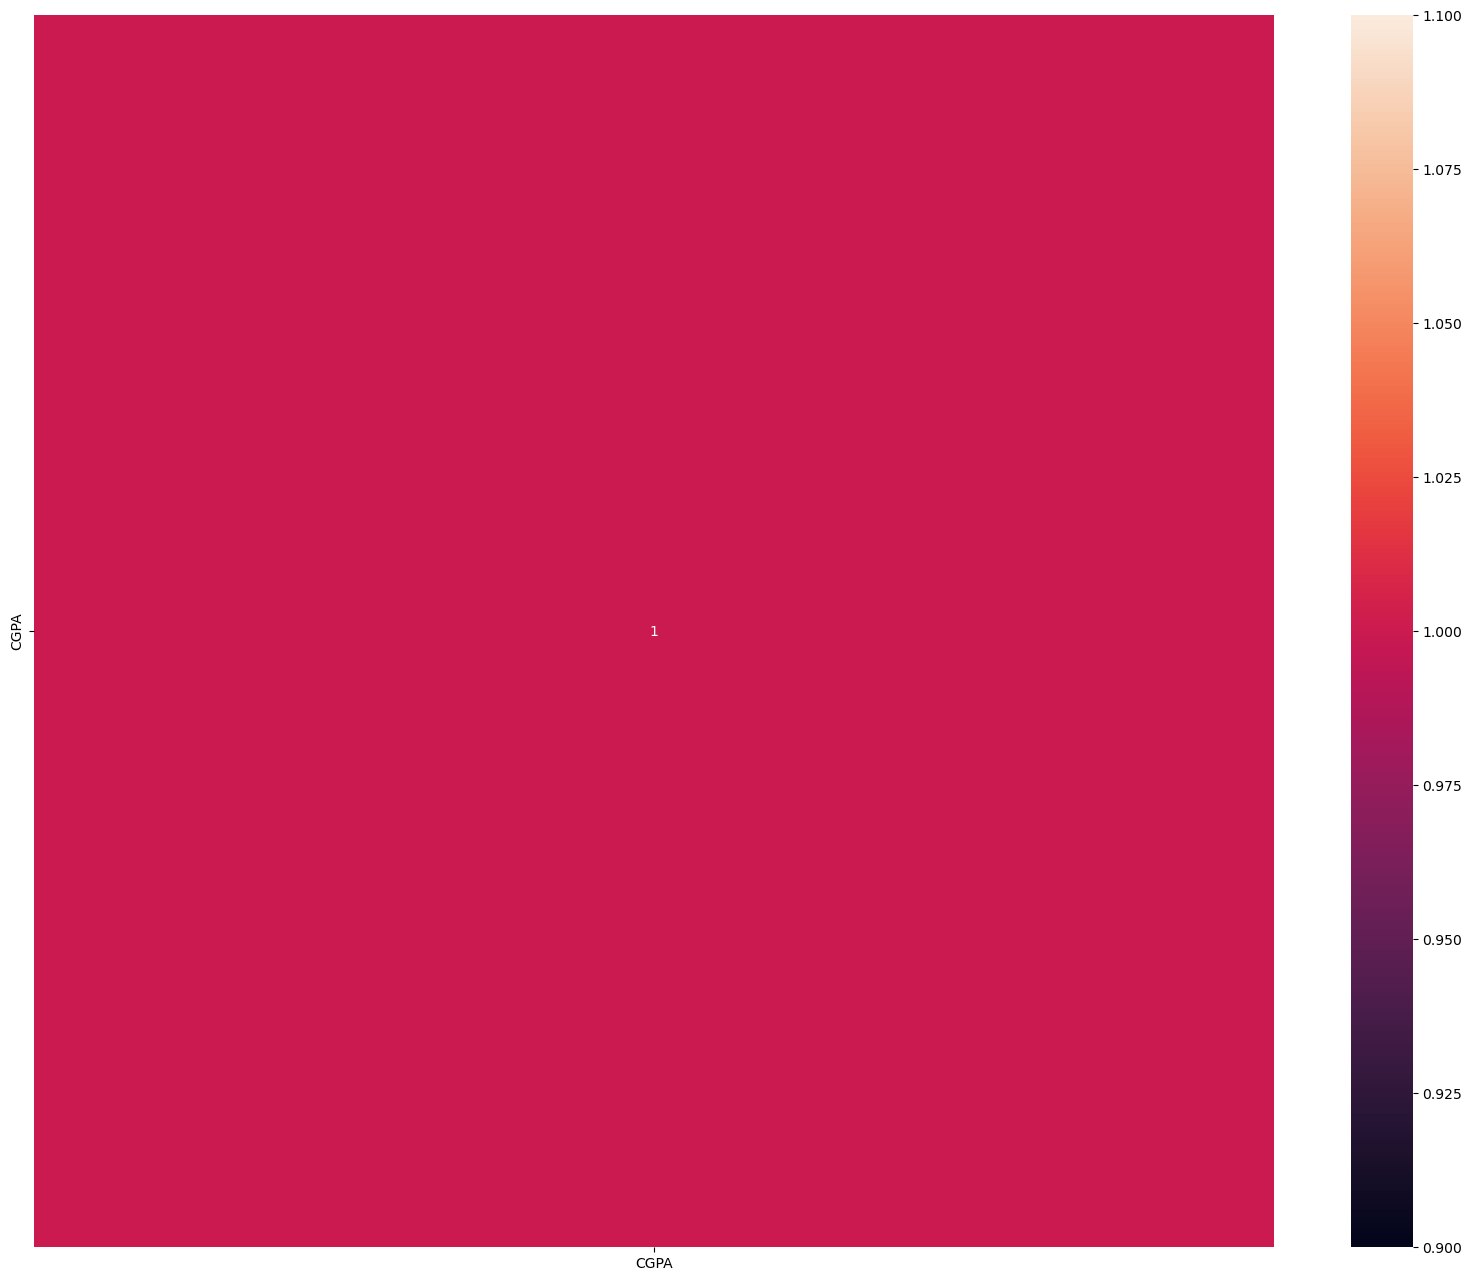

In [51]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True)

In [52]:
#Data preprocessing:

In [53]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [54]:
# Replace missing values with the mode of each column
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

In [55]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

No more null value

<AxesSubplot:>

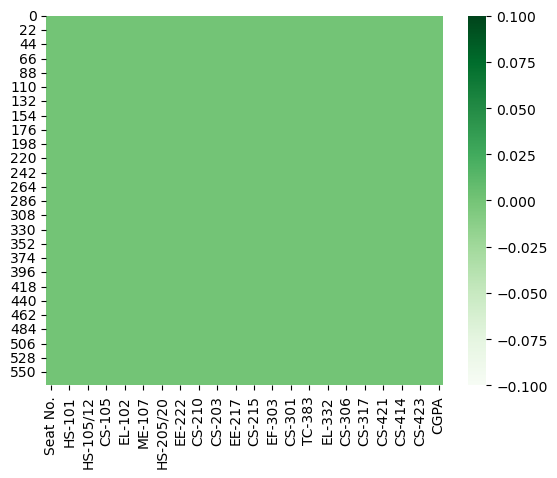

In [56]:
sns.heatmap(df.isnull(),cmap='Greens')

In [57]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [58]:
#Encoding Categorical Values
#The grades are encoded with the GPAs they are equivalent to

In [78]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [82]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    # check if column is categorical
    if df[column].dtype == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column].astype(str))
    # check if column is numerical
    elif df[column].dtype != 'float64':
        df[column] = df[column].astype(float)

In [83]:
print(df.dtypes)

Seat No.       int32
PH-121         int32
HS-101       float64
CY-105         int32
HS-105/12      int32
MT-111         int32
CS-105       float64
CS-106         int32
EL-102         int32
EE-119         int32
ME-107         int32
CS-107         int32
HS-205/20      int32
MT-222         int32
EE-222         int32
MT-224         int32
CS-210         int32
CS-211         int32
CS-203         int32
CS-214         int32
EE-217         int32
CS-212         int32
CS-215         int32
MT-331       float64
EF-303         int32
HS-304         int32
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332         int32
CS-318         int32
CS-306         int32
CS-312         int32
CS-317       float64
CS-403       float64
CS-421         int32
CS-406         int32
CS-414         int32
CS-419       float64
CS-423       float64
CS-412         int32
CGPA         float64
dtype: object


So now we have encoded the categorical columns to numerical columns using level encoder

In [84]:
df.sample(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
144,144,10,3.7,10,10,10,4.0,10,9,9,...,9,4.0,4.0,9,9,10,4.0,3.7,10,3.906
338,338,9,4.0,7,8,10,2.7,7,10,6,...,10,3.4,3.7,8,9,9,3.7,3.4,8,3.408
130,130,8,1.7,6,2,6,3.4,2,9,6,...,3,2.4,1.7,4,10,9,2.7,2.0,9,2.698
339,339,1,1.0,7,3,5,3.0,6,5,3,...,10,2.7,2.4,7,7,9,2.4,3.4,9,2.490
327,327,1,2.0,1,1,4,1.7,5,7,3,...,8,2.0,3.0,5,2,7,1.4,2.0,9,2.003
198,198,4,3.0,9,2,5,3.7,3,1,2,...,4,1.4,1.4,1,6,9,1.4,1.0,6,1.992
176,176,9,2.0,8,7,8,4.0,9,7,8,...,2,1.4,1.4,1,7,8,2.0,1.4,8,2.528
192,192,10,4.0,10,10,10,4.0,10,9,8,...,10,4.0,4.0,7,9,9,4.0,3.7,9,3.882
60,60,4,3.4,11,2,3,2.7,0,1,8,...,10,2.7,4.0,7,9,10,3.7,3.7,9,2.418
211,211,10,2.7,8,10,4,3.7,10,6,6,...,8,3.4,4.0,9,9,10,4.0,3.7,10,3.645


In [59]:
for column in df.columns:
    
    df[column]=df[column].replace('A+',4.0)
    df[column]=df[column].replace('A',4.0)
    df[column]=df[column].replace('A-',3.7)
    df[column]=df[column].replace('B+',3.4)
    df[column]=df[column].replace('B',3.0)
    df[column]=df[column].replace('B-',2.7)
    df[column]=df[column].replace('C+',2.4)
    df[column]=df[column].replace('C',2.0)
    df[column]=df[column].replace('C-',1.7)
    df[column]=df[column].replace('D+',1.4)
    df[column]=df[column].replace('D',1.0)
    df[column]=df[column].replace('F',0.0)

In [85]:
df.dtypes

Seat No.       int32
PH-121         int32
HS-101       float64
CY-105         int32
HS-105/12      int32
MT-111         int32
CS-105       float64
CS-106         int32
EL-102         int32
EE-119         int32
ME-107         int32
CS-107         int32
HS-205/20      int32
MT-222         int32
EE-222         int32
MT-224         int32
CS-210         int32
CS-211         int32
CS-203         int32
CS-214         int32
EE-217         int32
CS-212         int32
CS-215         int32
MT-331       float64
EF-303         int32
HS-304         int32
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332         int32
CS-318         int32
CS-306         int32
CS-312         int32
CS-317       float64
CS-403       float64
CS-421         int32
CS-406         int32
CS-414         int32
CS-419       float64
CS-423       float64
CS-412         int32
CGPA         float64
dtype: object

In [86]:
df['CS-412'].isna().sum()

0

In [87]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,6,1.4,3,4,3,1.4,1,3,5,...,3,1.7,1.7,3,9,10,1.7,3.0,9,2.205
1,1,10,1.0,2,1,6,2.0,1,10,1,...,2,1.0,2.0,1,9,6,2.0,2.0,7,2.008
2,2,10,3.0,10,6,8,4.0,6,8,8,...,7,3.0,4.0,4,10,10,4.0,3.7,10,3.608
3,3,1,2.4,2,1,1,3.7,2,3,0,...,2,2.0,1.4,3,6,7,2.4,2.4,5,1.906
4,4,9,3.7,9,8,10,4.0,9,8,9,...,6,3.4,3.4,6,9,10,3.7,3.7,10,3.448


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    int32  
 1   PH-121     571 non-null    int32  
 2   HS-101     571 non-null    float64
 3   CY-105     571 non-null    int32  
 4   HS-105/12  571 non-null    int32  
 5   MT-111     571 non-null    int32  
 6   CS-105     571 non-null    float64
 7   CS-106     571 non-null    int32  
 8   EL-102     571 non-null    int32  
 9   EE-119     571 non-null    int32  
 10  ME-107     571 non-null    int32  
 11  CS-107     571 non-null    int32  
 12  HS-205/20  571 non-null    int32  
 13  MT-222     571 non-null    int32  
 14  EE-222     571 non-null    int32  
 15  MT-224     571 non-null    int32  
 16  CS-210     571 non-null    int32  
 17  CS-211     571 non-null    int32  
 18  CS-203     571 non-null    int32  
 19  CS-214     571 non-null    int32  
 20  EE-217    

In [89]:
corr=df.corr()
corr

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,1.000000,-0.082463,0.001886,0.198484,0.253725,0.174990,-0.018043,0.318582,-0.017876,-0.038340,...,0.482889,0.040748,0.419055,0.212052,-0.365954,-0.504034,0.126711,-0.027974,-0.367368,0.054342
PH-121,-0.082463,1.000000,0.390291,0.575407,0.495786,0.447263,0.632442,0.261099,0.381946,0.644545,...,0.032331,0.497940,0.347052,0.350112,0.322835,0.162130,0.460583,0.099615,0.285731,0.642920
HS-101,0.001886,0.390291,1.000000,0.348367,0.474721,0.434971,0.432621,0.349891,0.358675,0.302745,...,0.219224,0.409697,0.243646,0.331575,0.319977,0.254870,0.283499,0.240377,0.250213,0.562432
CY-105,0.198484,0.575407,0.348367,1.000000,0.567520,0.531815,0.597678,0.363335,0.451354,0.518855,...,0.267044,0.493780,0.512089,0.405205,0.193730,0.040770,0.463500,0.129554,0.082414,0.655220
HS-105/12,0.253725,0.495786,0.474721,0.567520,1.000000,0.507662,0.503587,0.514378,0.371607,0.428955,...,0.309527,0.510427,0.516411,0.478406,0.225412,0.122900,0.488390,0.252667,0.192275,0.635200
MT-111,0.174990,0.447263,0.434971,0.531815,0.507662,1.000000,0.378220,0.515893,0.561498,0.405305,...,0.508758,0.586811,0.454186,0.572674,0.321206,0.238565,0.541646,0.416197,0.303913,0.708476
CS-105,-0.018043,0.632442,0.432621,0.597678,0.503587,0.378220,1.000000,0.258670,0.340437,0.563758,...,0.034305,0.397065,0.268677,0.279477,0.276989,0.115803,0.317141,0.044027,0.192450,0.627746
CS-106,0.318582,0.261099,0.349891,0.363335,0.514378,0.515893,0.258670,1.000000,0.330919,0.269555,...,0.527382,0.427551,0.489716,0.453625,0.139821,0.123640,0.467743,0.382693,0.187629,0.548816
EL-102,-0.017876,0.381946,0.358675,0.451354,0.371607,0.561498,0.340437,0.330919,1.000000,0.424483,...,0.332773,0.477169,0.331691,0.394750,0.300210,0.290765,0.381913,0.375216,0.294569,0.627214
EE-119,-0.038340,0.644545,0.302745,0.518855,0.428955,0.405305,0.563758,0.269555,0.424483,1.000000,...,0.158521,0.480503,0.373230,0.409835,0.296797,0.208255,0.486270,0.243920,0.334618,0.644788


<AxesSubplot:>

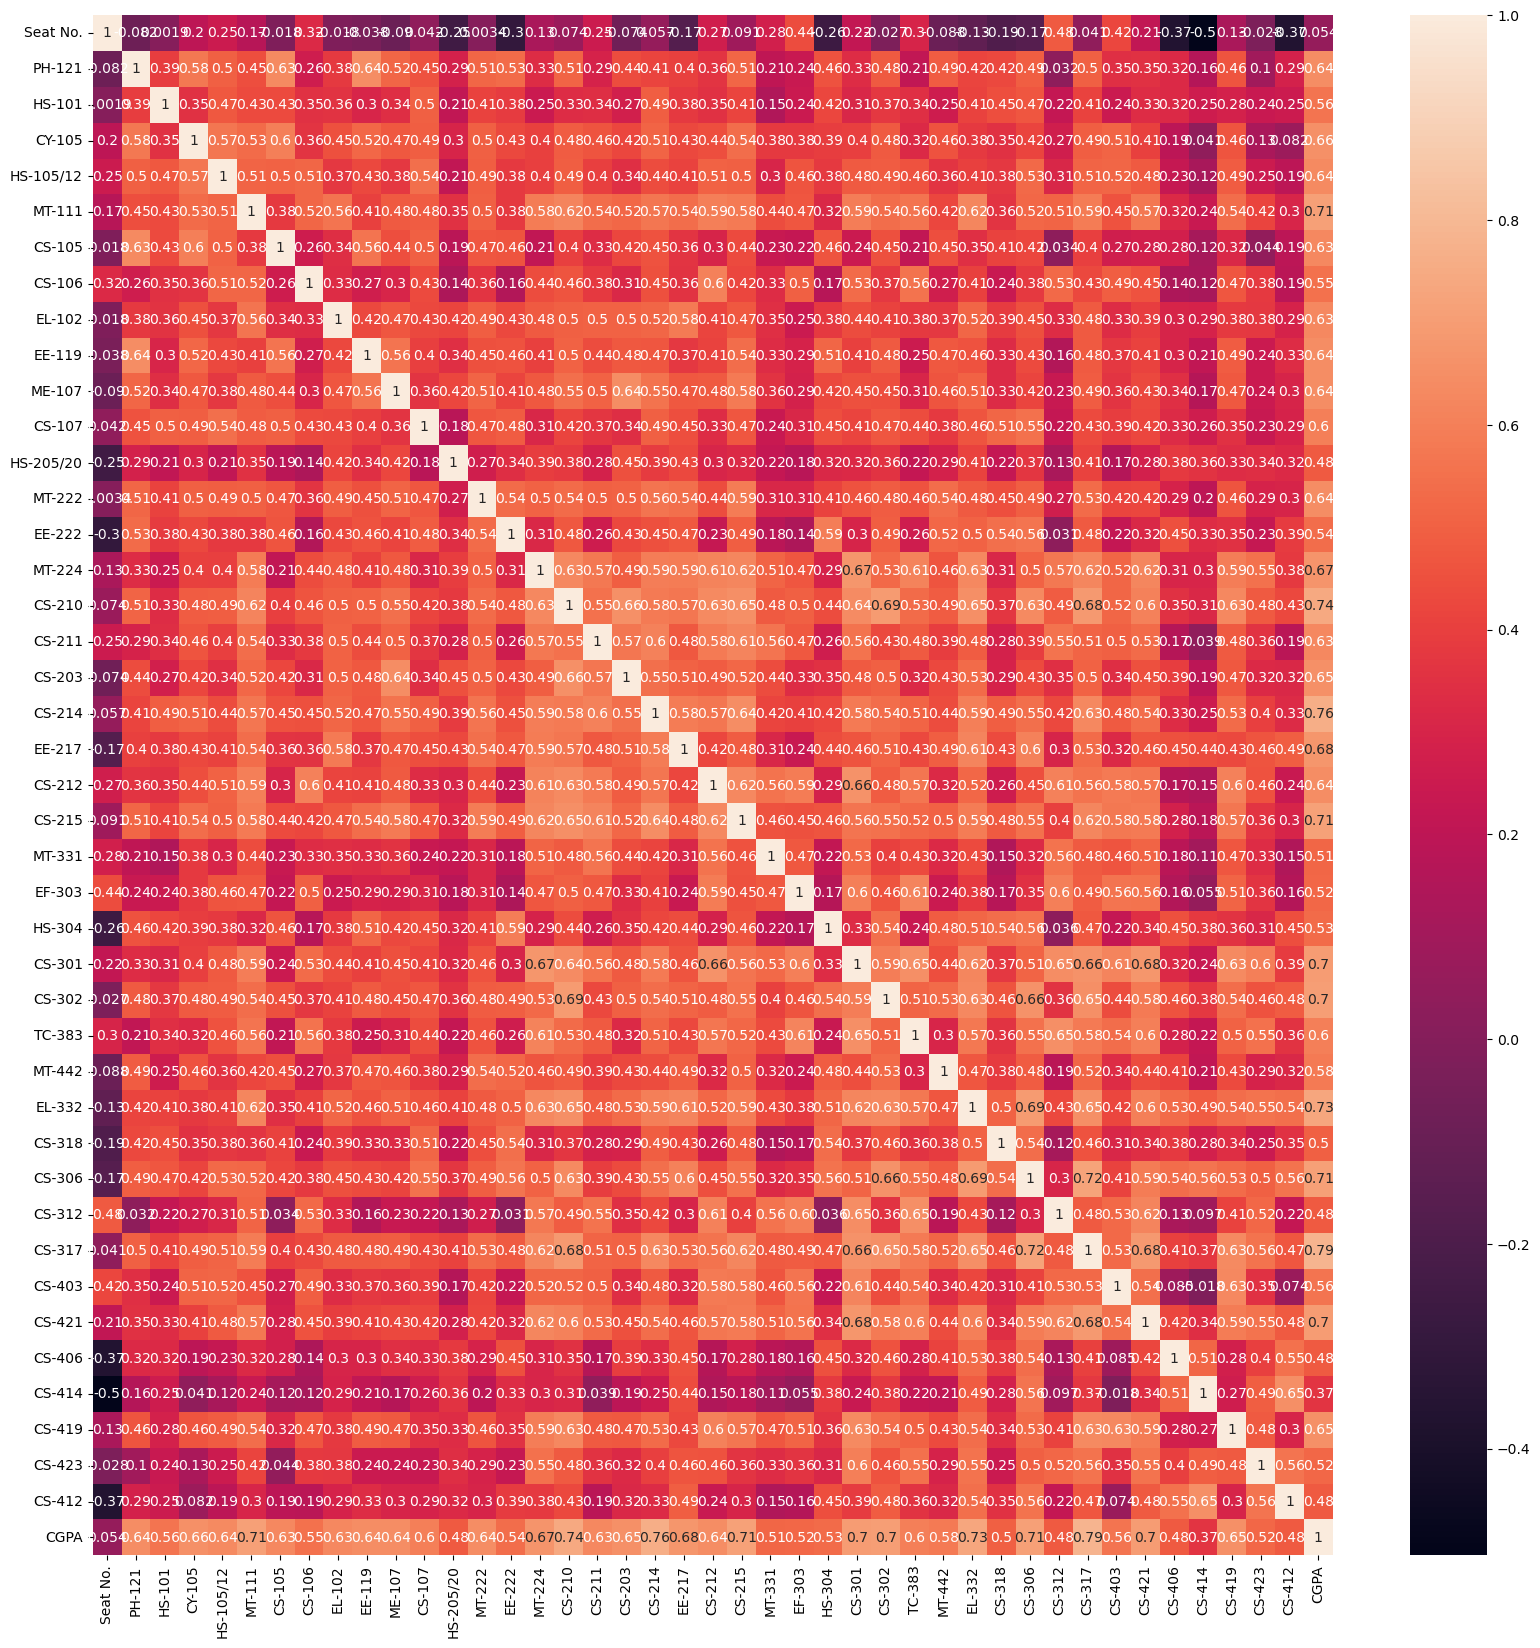

In [93]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [96]:
df.shape

(571, 43)

### Separating training and test data

In [94]:
x=df.iloc[:,:-1]
x

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0,6,1.4,3,4,3,1.4,1,3,5,...,4,3,1.7,1.7,3,9,10,1.7,3.0,9
1,1,10,1.0,2,1,6,2.0,1,10,1,...,1,2,1.0,2.0,1,9,6,2.0,2.0,7
2,2,10,3.0,10,6,8,4.0,6,8,8,...,9,7,3.0,4.0,4,10,10,4.0,3.7,10
3,3,1,2.4,2,1,1,3.7,2,3,0,...,3,2,2.0,1.4,3,6,7,2.4,2.4,5
4,4,9,3.7,9,8,10,4.0,9,8,9,...,9,6,3.4,3.4,6,9,10,3.7,3.7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,7,4.0,10,9,10,4.0,9,9,9,...,8,9,3.7,4.0,10,10,8,3.4,3.0,10
567,567,10,4.0,10,10,10,4.0,10,9,9,...,9,8,3.4,4.0,10,9,7,3.7,2.0,9
568,568,7,4.0,9,8,10,4.0,10,10,9,...,8,9,3.0,4.0,8,10,4,3.4,3.7,9
569,569,10,3.4,1,10,1,1.4,6,3,5,...,8,1,3.0,3.0,3,1,4,3.0,2.7,4


In [97]:
y=df.iloc[:,-1:]
y

,CGPA
0,2.205
1,2.008
2,3.608
3,1.906
4,3.448
...,...
566,3.798
567,3.772
568,3.470
569,2.193


In [98]:
# splitting the data into 76% training and 24% testing
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=43)

In [99]:
x_train.shape

(456, 42)

In [100]:
x_test.shape

(115, 42)

In [101]:
y_train.shape

(456, 1)

In [102]:
y_test.shape

(115, 1)

### Train and evaluate machine learning models:

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# define machine learning model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# train model on training set
model.fit(x_train, y_train)

# make predictions on test set
y_pred = model.predict(x_test)

# evaluate performance of model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(x_test, y_test)

print("Mean Squared Error:", mse)
print('\n')
print("Root Mean Squared Error:", rmse)
print('\n')
print("R-squared:", r2)

Mean Squared Error: 0.019025214559883694


Root Mean Squared Error: 0.13793192001811508


R-squared: 0.9438575411222326


In [118]:
#calling the liner regression as it is a linear regrerssion problem
lm=LinearRegression()
print('\n')

#we will perform the training of the data by fit method of linear regression
print(lm.fit(x_train,y_train))
print('\n')

#finding coef (b1,b2,b3,........,b12) value of individual column
print(lm.coef_)
print('\n')

#checking the intercept value(a)
print(lm.intercept_)
print('\n')


print(lm.score(x_train,y_train))
print('\n')



LinearRegression()


[[-4.97224270e-05  2.08050389e-02  8.47115622e-02  2.49519948e-02
   6.93636519e-03 -3.50984317e-03  1.31136519e-01  1.11228961e-02
   1.07327701e-02  1.66965934e-02 -3.56487446e-03  7.78737717e-03
   2.93826059e-02 -2.14489141e-03 -9.74977630e-03 -1.91092124e-03
   2.83574789e-03 -1.22106552e-03  1.13737761e-02  3.38527562e-02
   1.85695689e-02 -5.76298456e-03  2.20027687e-03  2.44623697e-02
   7.99280267e-03 -1.60325045e-02  4.89997905e-02  1.56531542e-02
   1.44689992e-03  1.60008042e-02  1.78541467e-02 -1.20265884e-02
  -9.72918381e-03 -9.27591220e-04  7.75158443e-02 -2.87892340e-03
   2.17796548e-02  3.25314280e-03 -1.15360601e-03  1.04180489e-03
   5.25705690e-02  1.57832963e-02]]


[0.25840931]


0.9075668162647597




score states how much our model has learned based on input data

Here its giving .90 or 90% the model has learned with the help of all input and output data

In [120]:
#now we will give the 30% data or x_test data to the predict method of linear regression and compare with the actual result
pred=lm.predict(x_test)
print('Predicted CGPA:',pred)
print('actual CGPA:',y_test)

Predicted CGPA: [[2.36645385]
 [3.46400732]
 [2.7474322 ]
 [2.49873659]
 [3.84659674]
 [3.53775713]
 [2.60615987]
 [2.28235893]
 [2.30052092]
 [2.90107979]
 [3.52722882]
 [2.66057577]
 [3.67207343]
 [2.28964535]
 [3.84484755]
 [2.76379697]
 [2.25681312]
 [3.65041443]
 [1.28131844]
 [2.52946244]
 [2.69768911]
 [3.72907192]
 [2.22482115]
 [2.28402902]
 [2.78252089]
 [3.39017005]
 [3.36577168]
 [2.4151783 ]
 [3.36945884]
 [3.37075751]
 [2.84904991]
 [2.77417729]
 [3.44500511]
 [3.3606715 ]
 [3.8536593 ]
 [2.83830398]
 [2.67771776]
 [3.86121722]
 [3.06599585]
 [1.81796924]
 [3.66984745]
 [3.43127392]
 [3.6507634 ]
 [3.74013418]
 [3.15312793]
 [2.15483075]
 [2.56807504]
 [3.09764206]
 [3.20139515]
 [3.6543492 ]
 [3.09776679]
 [3.58879526]
 [3.41127459]
 [3.54945037]
 [3.41490116]
 [3.13640412]
 [3.8090676 ]
 [3.74201898]
 [3.56675086]
 [2.55673868]
 [3.5504731 ]
 [3.42799815]
 [3.8383524 ]
 [3.36026844]
 [3.27334693]
 [2.99675558]
 [3.20133529]
 [3.21068406]
 [2.96185911]
 [2.37234343]
 [3.

In [122]:
#errors
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('error: ')
print('mean squared error: ',mean_squared_error(y_test,pred))
print('mean absolute error: ',mean_absolute_error(y_test,pred))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

error: 
mean squared error:  0.026219533055611324
mean absolute error:  0.1100441248727759
root mean squared error:  0.16192446713085495


In [123]:
#r2 score --> coefficient of determination
#i.e the propertion of the variance in tthe dependent variable thst i spredictable from independent variable
#i.e change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.922627466211455


upto 92% change is coming

### Testing the accuracy

In [127]:
# now as the model is working we can give new input variables
t=np.array([4,9,3.7,9,8,4.0,9,8,9,4.5,3.4,5,3,4,6,8,9,4,7,3,5,7,2,8,9,5,3,7,3,5,6,7,3,86,3.4,3.4,6,9,10,3.7,3.7,10])

In [128]:
t.shape

(42,)

In [129]:
#reshaping the data to 2D model as its PERFORMING as 1D and our model is trained in 2D
t=t.reshape(1,-1)
#1 ROW and -1 means many columns or in this case 12 columns

In [130]:
t.shape

(1, 42)

In [131]:
lm.predict(t)

array([[3.95791834]])

In [132]:
df1=pd.DataFrame(pred)
df1.to_csv('students_grade.csv')

### Saving the Model

In [134]:
#Since the Model without Outliers performing best! We will select that DataFrame.
import joblib
joblib.dump(lm,'gradefile.obj')

['gradefile.obj']